In [2]:
import bnn

classifier = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1, 'road-signs', bnn.RUNTIME_HW)

Setting network weights and thresholds in accelerator...


In [3]:
print(classifier.classes)

['20 Km/h', '30 Km/h', '50 Km/h', '60 Km/h', '70 Km/h', '80 Km/h', 'End 80 Km/h', '100 Km/h', '120 Km/h', 'No overtaking', 'No overtaking for large trucks', 'Priority crossroad', 'Priority road', 'Give way', 'Stop', 'No vehicles', 'Prohibited for vehicles with a permitted gross weight over 3.5t including their trailers, and for tractors except passenger cars and buses', 'No entry for vehicular traffic', 'Danger Ahead', 'Bend to left', 'Bend to right', 'Double bend (first to left)', 'Uneven road', 'Road slippery when wet or dirty', 'Road narrows (right)', 'Road works', 'Traffic signals', 'Pedestrians in road ahead', 'Children crossing ahead', 'Bicycles prohibited', 'Risk of snow or ice', 'Wild animals', 'End of all speed and overtaking restrictions', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Ahead or right only', 'Ahead or left only', 'Pass by on right', 'Pass by on left', 'Roundabout', 'End of no-overtaking zone', 'End of no-overtaking zone for vehicles with a permitted gro

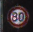

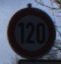

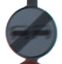

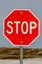

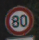

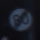

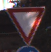

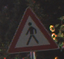

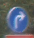

In [4]:
from PIL import Image
import numpy as np
from os import listdir
from os.path import isfile, join
from IPython.display import display

imgList = [f for f in listdir("/home/xilinx/jupyter_notebooks/bnn/pictures/road_signs/") if isfile(join("/home/xilinx/jupyter_notebooks/bnn/pictures/road_signs/", f))]

images = []
   
for imgFile in imgList:
	img = Image.open("/home/xilinx/jupyter_notebooks/bnn/pictures/road_signs/" + imgFile)
	images.append(img)    
	img.thumbnail((64, 64), Image.ANTIALIAS)
	display(img) 
  

In [5]:
results = classifier.classify_images(images)
print("Identified classes: {0}".format(results))
for index in results:
    print("Identified class name: {0}".format((classifier.class_name(index))))

Packing and interleaving CIFAR-10 inputs...
Running prebuilt CIFAR-10 test for 13 images...
Inference took 6149 microseconds, 473 usec per image
Classification rate: 2114.16 images per second
Inference took 6149.00 microseconds, 473.00 usec per image
Classification rate: 2114.16 images per second
Identified classes: [ 5 13  8  8 41 14 30  5 38  6 13 27 33]
Identified class name: 80 Km/h
Identified class name: Give way
Identified class name: 120 Km/h
Identified class name: 120 Km/h
Identified class name: End of no-overtaking zone
Identified class name: Stop
Identified class name: Risk of snow or ice
Identified class name: 80 Km/h
Identified class name: Pass by on right
Identified class name: End 80 Km/h
Identified class name: Give way
Identified class name: Pedestrians in road ahead
Identified class name: Turn right ahead


In [6]:
sw_class = bnn.CnvClassifier(bnn.NETWORK_CNVW1A1,"road-signs", bnn.RUNTIME_SW)

results = sw_class.classify_images(images)
print("Identified classes: {0}".format(results))
for index in results:
    print("Identified class name: {0}".format((classifier.class_name(index))))

Setting network weights and thresholds in accelerator...
Packing and interleaving CIFAR-10 inputs...
Running prebuilt CIFAR-10 test for 13 images...
Inference took 20688239 microseconds, 1.5914e+06 usec per image
Classification rate: 0.628376 images per second
Inference took 20688240.62 microseconds, 1591403.12 usec per image
Classification rate: 0.63 images per second
Identified classes: [ 5 13  8  8 41 14 30  5 38  6 13 27 33]
Identified class name: 80 Km/h
Identified class name: Give way
Identified class name: 120 Km/h
Identified class name: 120 Km/h
Identified class name: End of no-overtaking zone
Identified class name: Stop
Identified class name: Risk of snow or ice
Identified class name: 80 Km/h
Identified class name: Pass by on right
Identified class name: End 80 Km/h
Identified class name: Give way
Identified class name: Pedestrians in road ahead
Identified class name: Turn right ahead


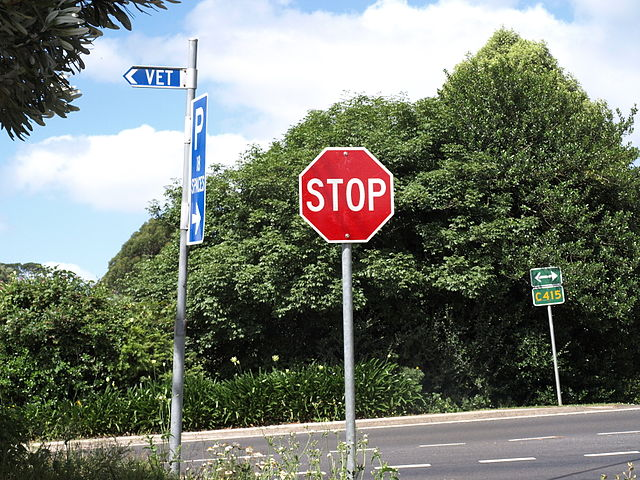

In [6]:
from PIL import Image
image_file = "/home/xilinx/jupyter_notebooks/bnn/pictures/street_with_stop.JPG"
im = Image.open(image_file)
im

In [7]:
images = []
bounds = []
for s in [64,96]:
    stride = s // 4
    x_tiles = im.width // stride
    y_tiles = im.height // stride
    
    for j in range(y_tiles):
        for i in range(x_tiles):
            bound = (stride * i, stride * j, stride * i + s, stride * j + s)
            if bound[2] <= im.width and bound[3] < im.height:
                c = im.crop(bound)
                images.append(c)
                bounds.append(bound)

print(len(images))

1330


Packing and interleaving CIFAR-10 inputs...
Running prebuilt CIFAR-10 test for 1330 images...
Inference took 437708 microseconds, 329.104 usec per image
Classification rate: 3038.56 images per second
Inference took 437708.00 microseconds, 329.10 usec per image
Classification rate: 3038.56 images per second


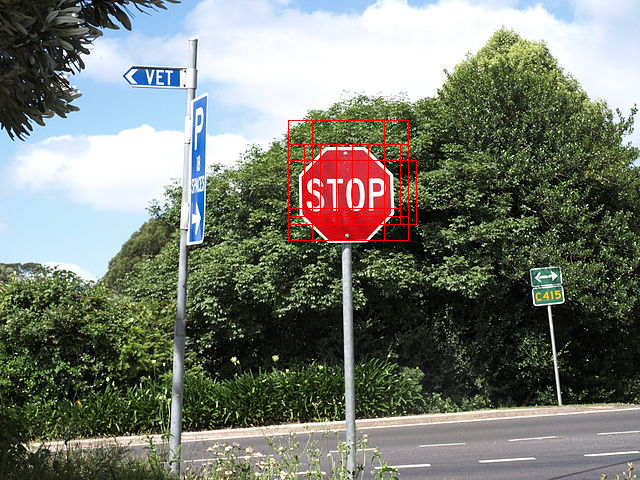

In [8]:
results = classifier.classify_images(images)
stop = results == 14
indicies = []
indicies = stop.nonzero()[0]
from PIL import ImageDraw
im2 = Image.open(image_file)
draw2 = ImageDraw.Draw(im2)
for i in indicies:
    draw2.rectangle(bounds[i], outline='red')

im2

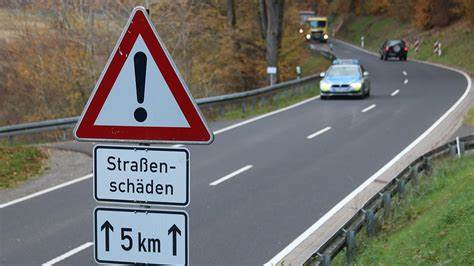

In [9]:
from PIL import Image
image_file = "/home/xilinx/jupyter_notebooks/bnn/pictures/OIP.jpg"
im = Image.open(image_file)
im

466
Packing and interleaving CIFAR-10 inputs...
Running prebuilt CIFAR-10 test for 466 images...
Inference took 154589 microseconds, 331.736 usec per image
Classification rate: 3014.44 images per second
Inference took 154589.00 microseconds, 331.74 usec per image
Classification rate: 3014.44 images per second


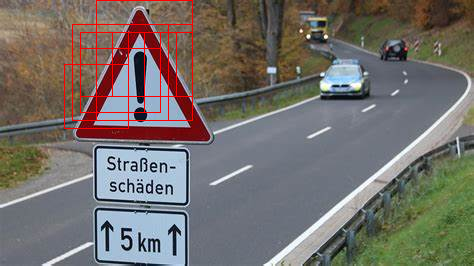

In [14]:
images = []
bounds = []
for s in [64,96]:
    stride = s // 4
    x_tiles = im.width // stride
    y_tiles = im.height // stride
    
    for j in range(y_tiles):
        for i in range(x_tiles):
            bound = (stride * i, stride * j, stride * i + s, stride * j + s)
            if bound[2] <= im.width and bound[3] < im.height:
                c = im.crop(bound)
                images.append(c)
                bounds.append(bound)

print(len(images))
results = classifier.classify_images(images)
stop = results == 18
indicies = []
indicies = stop.nonzero()[0]
from PIL import ImageDraw
im2 = Image.open(image_file)
draw2 = ImageDraw.Draw(im2)
for i in indicies:
    draw2.rectangle(bounds[i], outline='red')

im2

In [23]:
results = classifier.classify_images(images)
print("Identified classes: {0}".format(results))
for index in results:
    print("Identified class name: {0}".format((classifier.class_name(index))))

Packing and interleaving CIFAR-10 inputs...
Running prebuilt CIFAR-10 test for 1 images...
Inference took 1581.00 microseconds, 1581.00 usec per image
Classification rate: 632.51 images per second
Identified classes: [9]
Identified class name: No overtaking
Inference took 1581 microseconds, 1581 usec per image
Classification rate: 632.511 images per second
